#### Imports

In [1]:
from dredFISH.Analysis.TissueGraph import *
from dredFISH.Analysis.Taxonomy import *

from MERFISH_Objects.FISHData import *

from sklearn.preprocessing import normalize

import matplotlib.pyplot as plt 

#### Load data

In [2]:
base_path = '/bigstore/Images2021/gaby/dredFISH/DPNMF_PolyA_2021Nov19/'
dataset = 'DPNMF_PolyA_2021Nov19'
fishdata = FISHData(os.path.join(base_path,'fishdata'))
data = fishdata.load_data('h5ad',dataset=dataset)
data.obs_names_make_unique()

data.X = data.layers['total_vectors']
data = data[np.isnan(data.X.max(1))==False]

data.X = data.X/data.obs['total_signal'][:,None]
data.X = data.X - np.array([np.percentile(data.X[:,i],25) for i in range(data.X.shape[1])])
data.X = data.X / np.array([np.percentile(data.X[:,i],75) for i in range(data.X.shape[1])])
data.X = normalize(data.X)

XY = np.asarray([data.obs['stage_y'], data.obs['stage_x']])
XY = np.transpose(XY)
data.obsm['stage'] = XY

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
/tmp/ipykernel_3949841/676460092.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  data.X = data.X/data.obs['total_signal'][:,None]


#### Build layers 1-2: cells and zones

In [3]:
TMG = TissueMultiGraph()
TMG.createCellAndZoneLayers(XY,data.X)

Build similarity graph 
calculation took: 269.20
Calling initial optimization
 
 Func-count     x          f(x)          Procedure
    1        11.5208     -7.48827        initial
    2        18.5792     -7.28221        golden
    3        7.15843     -7.61383        golden
    4        4.46235     -7.39579        golden
    5        8.41328      -7.7391        parabolic
    6        8.99191     -7.64967        parabolic
    7        8.14563     -7.67221        parabolic
    8        8.54092     -7.58414        parabolic
    9        8.31105     -7.65227        golden
   10        8.46203      -7.6363        golden
   11        8.37423     -7.64651        golden
   12         8.4319     -7.60653        golden
   13        8.39836      -7.6688        golden
   14        8.42039     -7.60908        golden
   15        8.40758     -7.59737        golden
   16        8.41661      -7.6146        golden

Optimization terminated successfully;
The returned value satisfies the termination crit

In [5]:
TMG.save()

In [2]:
TMG = TissueMultiGraph('debuging_12262021.pkl')

#### Build layers 3-4: communities and regions 

In [3]:
TMG.createCommunitiesAndRegionLayers()

/home/rwollman/MyProjects/MaximallyInformativeBiocartography/dredFISH/dredFISH/Analysis/TissueGraph.py:690: RuntimeWarning: invalid value encountered in true_divide
  q = q_no/q_deno


Build similarity graph 
calculation took: 1.43
Calling initial optimization
 
 Func-count     x          f(x)          Procedure
    1        11.5208     -1.71181        initial
    2        18.5792     -1.76063        golden
    3        22.9416     -1.72309        golden
    4        17.5945     -1.64726        parabolic
    5        18.5825       -1.719        parabolic
    6        18.2031     -1.71003        golden
    7        18.4356     -1.66599        golden
    8        18.5243      -1.7281        golden
    9        18.5583     -1.74547        golden
   10        18.5712     -1.65013        golden
   11        18.5759     -1.67746        golden

Optimization terminated successfully;
The returned value satisfies the termination criteria
(using xtol =  0.01 )
Initial entropy was: 1.760626527807588 number of evals: 11
calculation took: 2.32
Initial types found: 156


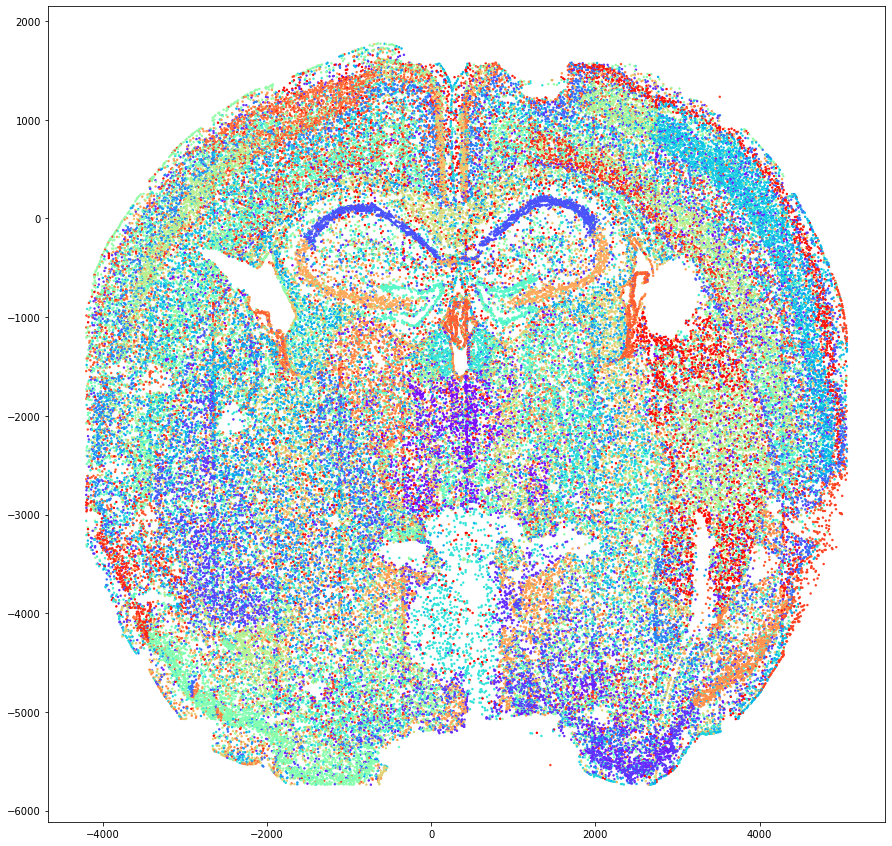

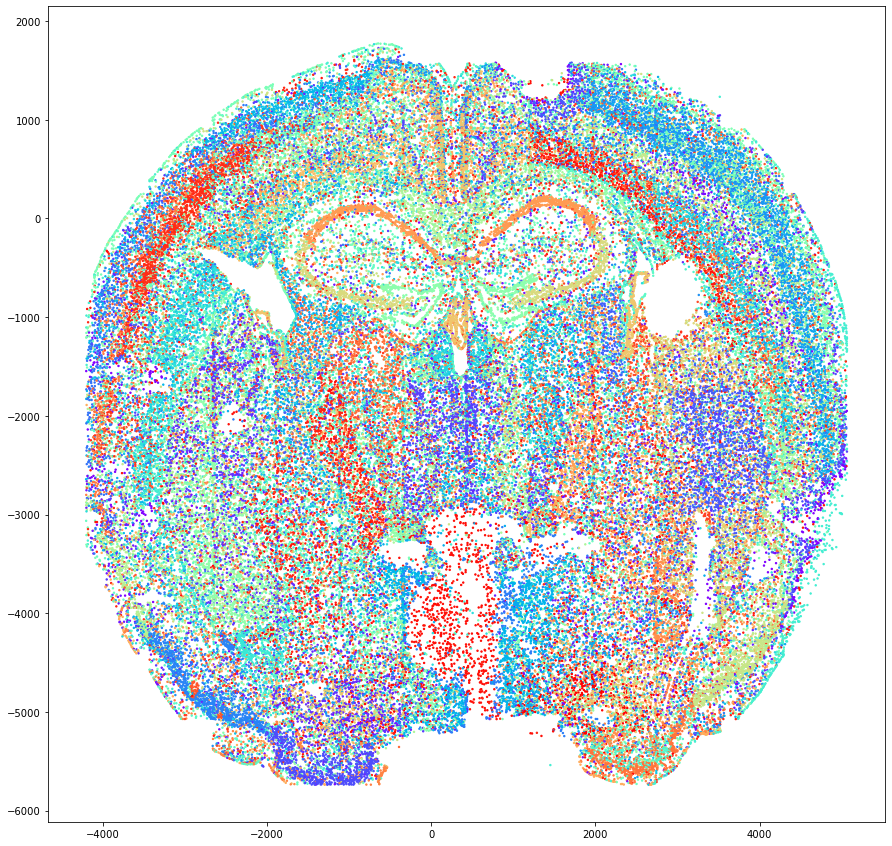

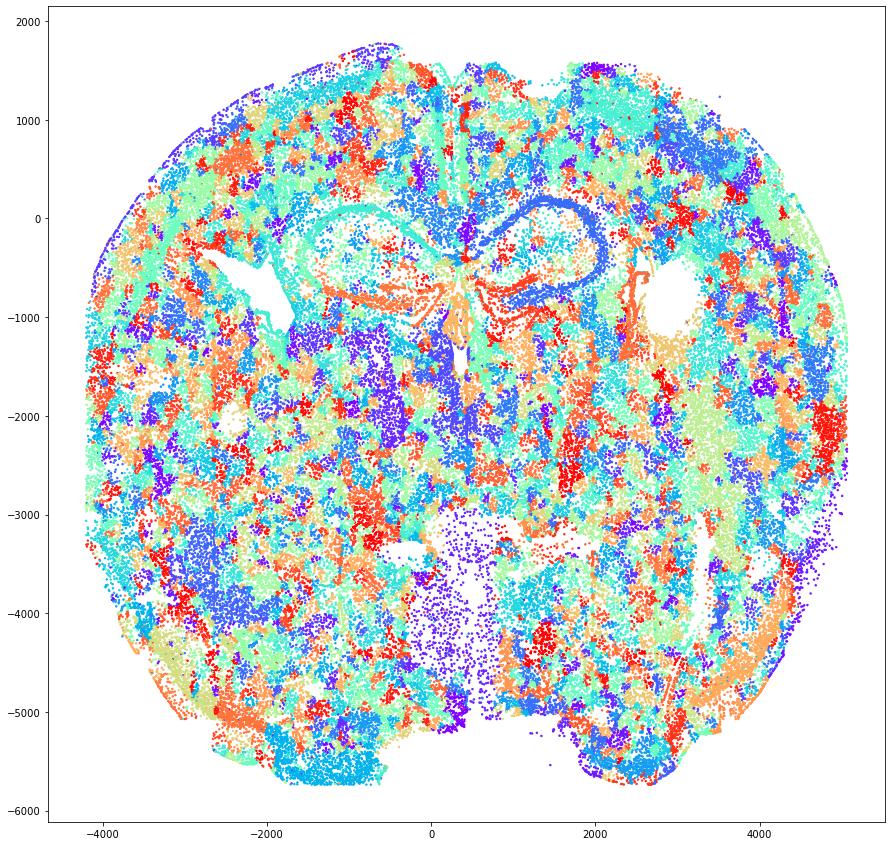

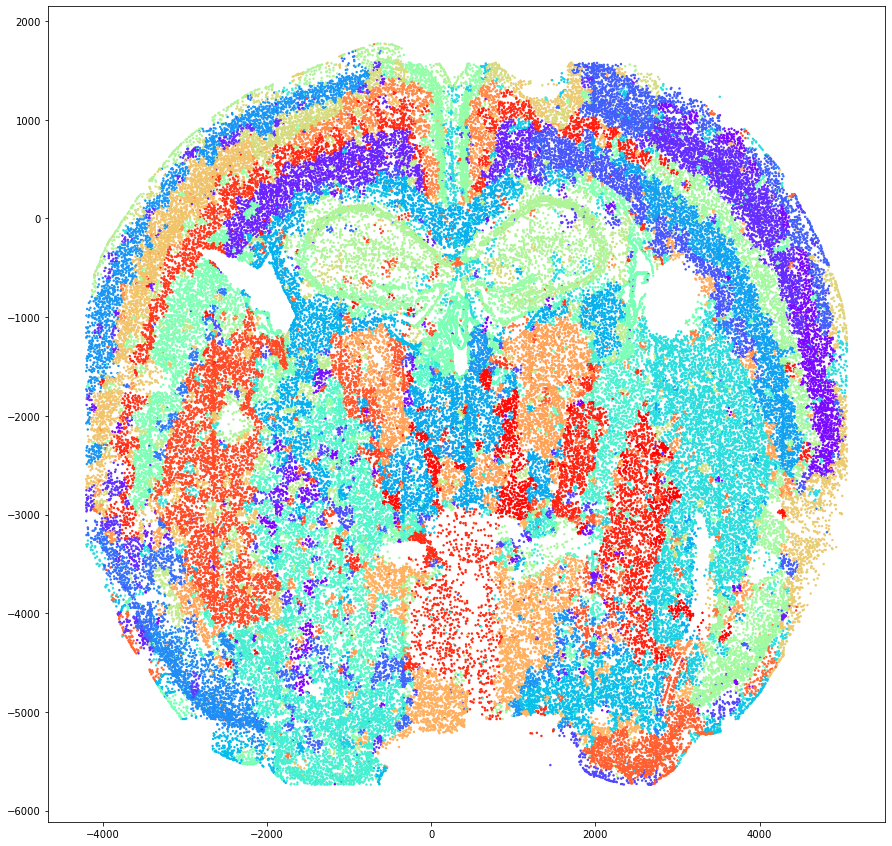

In [5]:
for i in range(len(TMG.Layers)):
    TMG.scatter(i)